# Projeto - Análise da Personalidade do Cliente

## Introdução

A Análise da Personalidade do Cliente é uma análise detalhada dos clientes ideais de uma empresa. Ajuda uma empresa a entender melhor seus clientes e torna mais fácil para modificar seus produtos de acordo com as necessidades, comportamentos e preocupações específicos de diferentes tipos de clientes. Neste trabalho extraímos informações de dados sobre 2240 clientes com 29 variáveis.

#### Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import squarify
sns.set_style("whitegrid")

#### Lendo o arquivo de dados

In [2]:
pd.set_option("display.max_columns", None) # Mostrar todas as colunas do dataframe

In [3]:
df = pd.read_csv("marketing_campaign.csv", sep="\t") #Ler arquivo

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


#### Principais informações do DataFrame

In [4]:
df.info() # Principais informações

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe() # Principais estatísticas

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### Colunas com valor único

As colunas "Z_CostContact" e "Z_Revenue" tem todos os valores iguais, a coluna "ID" não será relevante para as análises

In [6]:
df["Z_CostContact"].value_counts() #Coluna Z_CostContact com todos os valores iguais

3    2240
Name: Z_CostContact, dtype: int64

In [7]:
df["Z_Revenue"].value_counts() #Coluna Z_Revenue com todos os valores iguais

11    2240
Name: Z_Revenue, dtype: int64

In [8]:
df.drop(["Z_CostContact", "Z_Revenue", "ID"], axis=1, inplace=True) # Drop nas colunas

#### Verificando linhas duplicadas e removendo-as

In [9]:
# Verificando se há linhas duplicadas
df[df.loc[:, "Year_Birth":"Income"].duplicated(keep=False)]

# Excluindo as linhas duplicadas
df.drop_duplicates(subset=["Year_Birth", "Education", "Marital_Status", "Income"], inplace=True)

#### Outliers

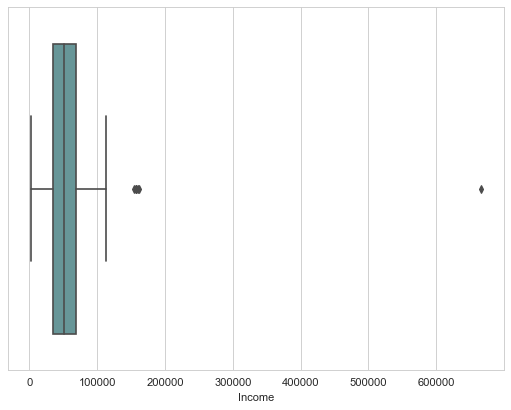

In [10]:
# Boxplot para verificar dados outliers na coluna "Income"
plt.figure(figsize=(8,6), dpi= 80)
sns.boxplot(x="Income", data=df, color="cadetblue");

In [11]:
df[df["Income"] > 200000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0


In [12]:
# Excluindo outlier da coluna
df.drop(2233, inplace=True)

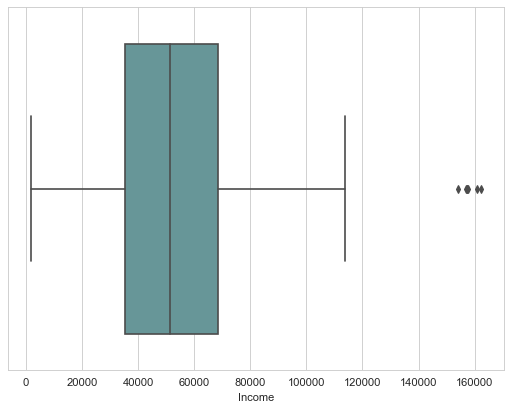

In [13]:
# Boxplot após excluir o outlier da coluna
plt.figure(figsize=(8,6), dpi= 80)
sns.boxplot(x="Income", data=df, color="cadetblue");

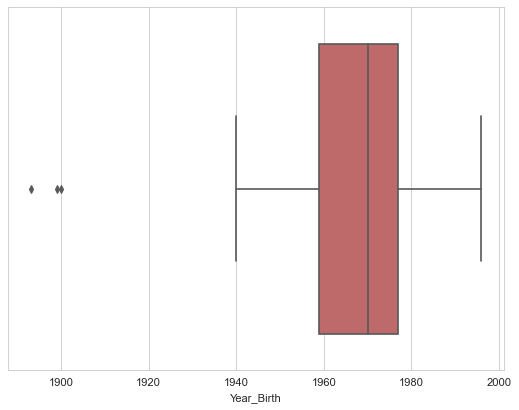

In [14]:
# Boxplot para verificar dados outliers na coluna "Year_Birth"
plt.figure(figsize=(8,6), dpi= 80)
sns.boxplot(x="Year_Birth", data=df, color="indianred");

In [15]:
df[df["Year_Birth"] < 1940]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


In [16]:
# Excluindo clientes com data de nascimento anterior a 1940
df.drop([192, 239, 339], inplace=True)

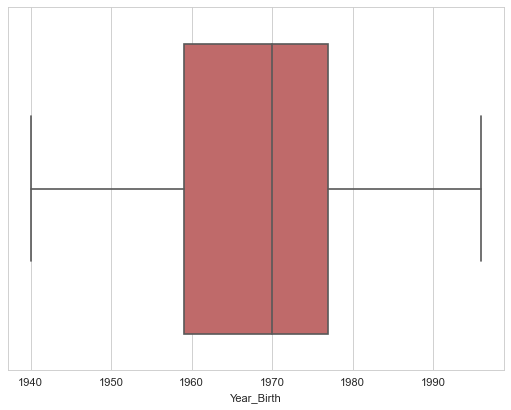

In [17]:
# Boxplot após excluir outliers da coluna
plt.figure(figsize=(8,6), dpi= 80)
sns.boxplot(x="Year_Birth", data=df, color="indianred");

#### Valores nulos

In [18]:
# Verificando valores nulos
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [19]:
# Crinado uma coluna para armazenar quais clientes possuem valor nulo na coluna income que será substituído
df["ImputedIncome"] = df["Income"].isna().astype('int64')

In [20]:
df["ImputedIncome"].sum()

24

In [21]:
# Preencher NaN da coluna Income com média por Education
df["IncomeMean"] = df.groupby("Education")["Income"].transform('mean')

In [22]:
df["Income"].fillna(df["IncomeMean"], inplace=True)

In [23]:
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
ImputedIncome          0
IncomeMean             0
dtype: int64

#### Clientes com Marital_Status incomum

In [24]:
# Drop Alone, Absurd, YOLO pois são clintes com estado civil incomum, 
filtro = df[(df["Marital_Status"] == "Alone") | (df["Marital_Status"] == "Absurd") | (df["Marital_Status"] == "YOLO")]
df.drop(filtro.index, inplace=True)

#### Coluna com gasto total

In [25]:
# Criando coluna TotalPurchases com o gasto total
df["TotalPurchases"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

#### Correlação

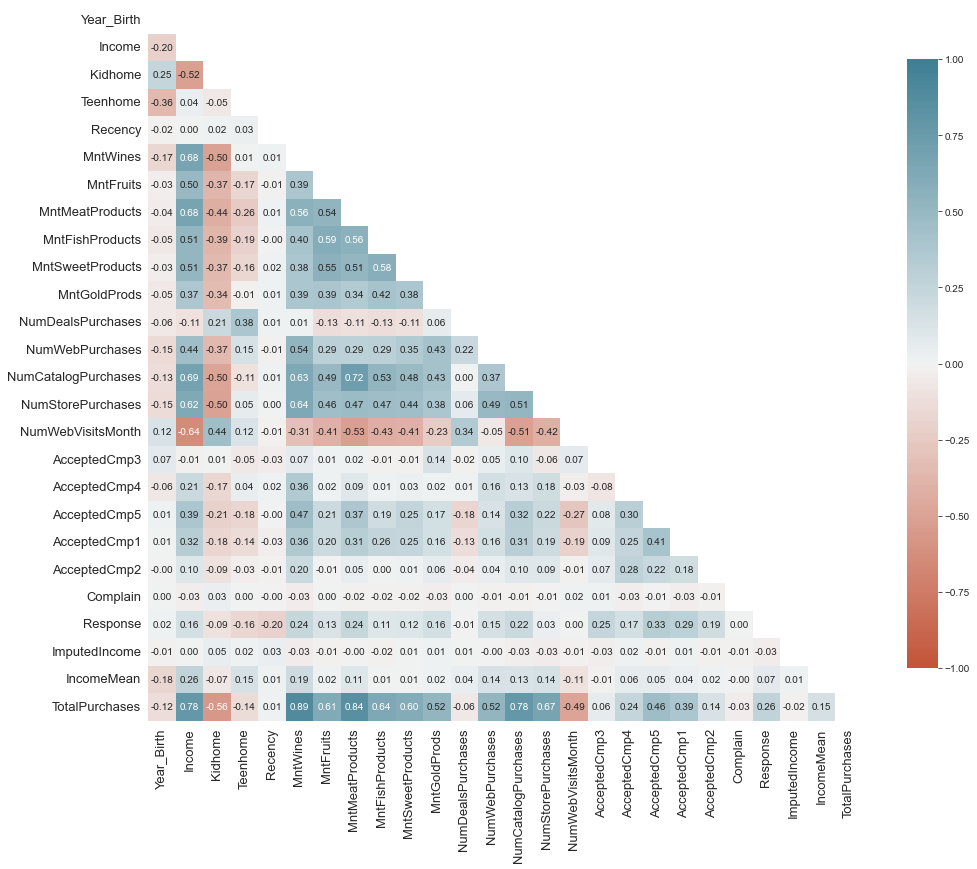

In [26]:
# Criando heatmap com correlação
plt.figure(figsize=(16, 16)) #tamanho do gráfico
corr = df.corr() #correlação do dataframe

matrix = np.triu(corr) #mask para plotar apenas metade do heatmap

heatmap = sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200), cbar_kws={"shrink": .7}, vmin=-1, vmax=1, center=0, square=True, annot=True, fmt=".2f", mask=matrix);

# Aumentando tamanho dos eixos x e y
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

### 1 - Analise do gasto total dos clientes em relação ao perfil dos grupos

In [27]:
# Dividindo os clientes em faixas etárias:
df["cut_year"] = pd.cut(2021-df.Year_Birth, [20,40,60,85], right=False, labels=["20-39 years", "40-59 years", "60 years and older"])
df["cut_year"].value_counts()

40-59 years           1127
60 years and older     595
20-39 years            307
Name: cut_year, dtype: int64

In [28]:
# Dividindo os clientes em faixas salarial:
df["cut_income"] = pd.cut(df.Income, [1500,20000,50000, 80000, 165000], labels=["(1500, 20000]", "(20000, 50000]", "(50000, 80000]", "(80000, 165000]"])
df["cut_income"].value_counts()

(50000, 80000]     878
(20000, 50000]     841
(80000, 165000]    194
(1500, 20000]      116
Name: cut_income, dtype: int64

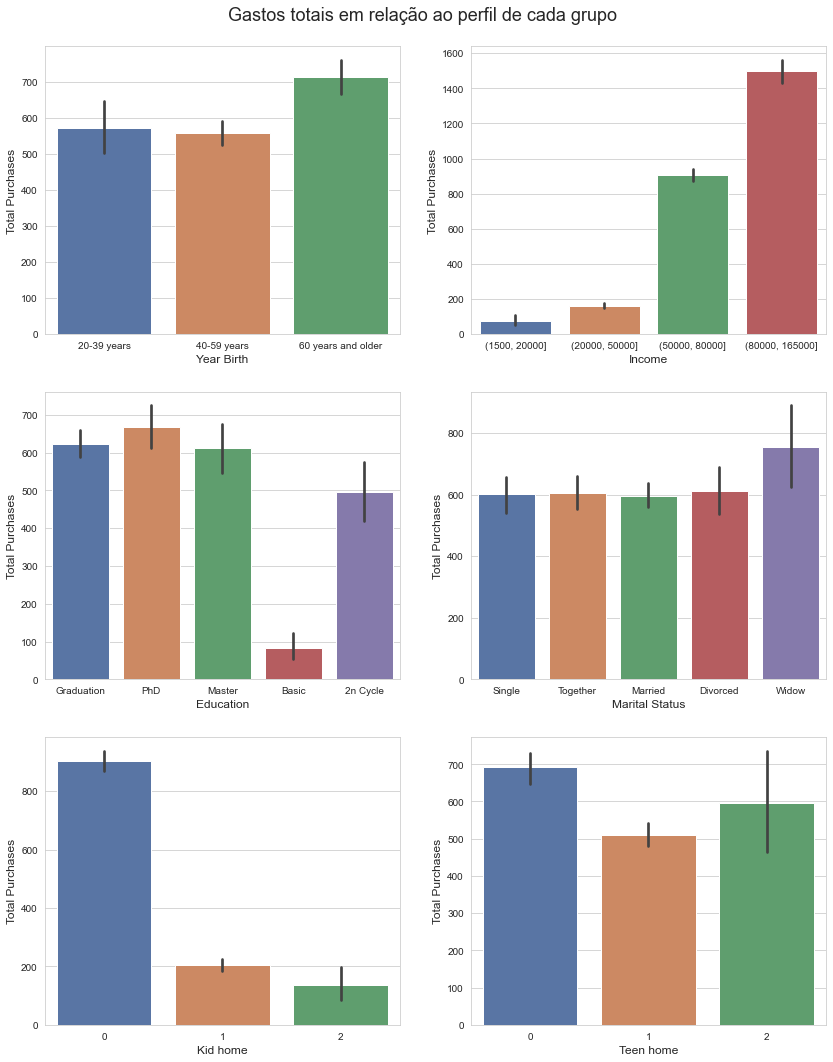

In [29]:
#Criando subplots para os 6 gráficos
fig, axs = plt.subplots(3, 2, figsize=(14,18))
fig.suptitle("Gastos totais em relação ao perfil de cada grupo", fontsize=18, va= "baseline", y=0.9);

# Barplot para relacionar o gasto total dos clientes e suas características
sns.barplot(ax=axs[0,0], x="cut_year", y="TotalPurchases", data=df, palette="deep"); # Birth_Year
axs[0,0].set_xlabel('Year Birth', fontsize = 12) #Configurar nome dos eixos e tamanhos
axs[0,0].set_ylabel('Total Purchases', fontsize = 12)

sns.barplot(ax=axs[0,1], x="cut_income", y="TotalPurchases", data=df, palette="deep"); # Income
axs[0,1].set_xlabel('Income', fontsize = 12)
axs[0,1].set_ylabel('Total Purchases', fontsize = 12)

sns.barplot(ax=axs[1,0], x="Education", y="TotalPurchases", data=df, palette="deep"); # Education
axs[1,0].set_xlabel('Education', fontsize = 12)
axs[1,0].set_ylabel('Total Purchases', fontsize = 12)

sns.barplot(ax=axs[1,1], x="Marital_Status", y="TotalPurchases", data=df, palette="deep"); # Marital_Status
axs[1,1].set_xlabel('Marital Status', fontsize = 12)
axs[1,1].set_ylabel('Total Purchases', fontsize = 12)

sns.barplot(ax=axs[2,0], x="Kidhome", y="TotalPurchases", data=df, palette="deep"); # Kidhome
axs[2,0].set_xlabel('Kid home', fontsize = 12)
axs[2,0].set_ylabel('Total Purchases', fontsize = 12)

sns.barplot(ax=axs[2,1], x="Teenhome", y="TotalPurchases", data=df, palette="deep"); # Teenhome
axs[2,1].set_xlabel('Teen home', fontsize = 12)
axs[2,1].set_ylabel('Total Purchases', fontsize = 12);

### 2 - Qual a relação entre o consumo de cada produto e crianças em casa?

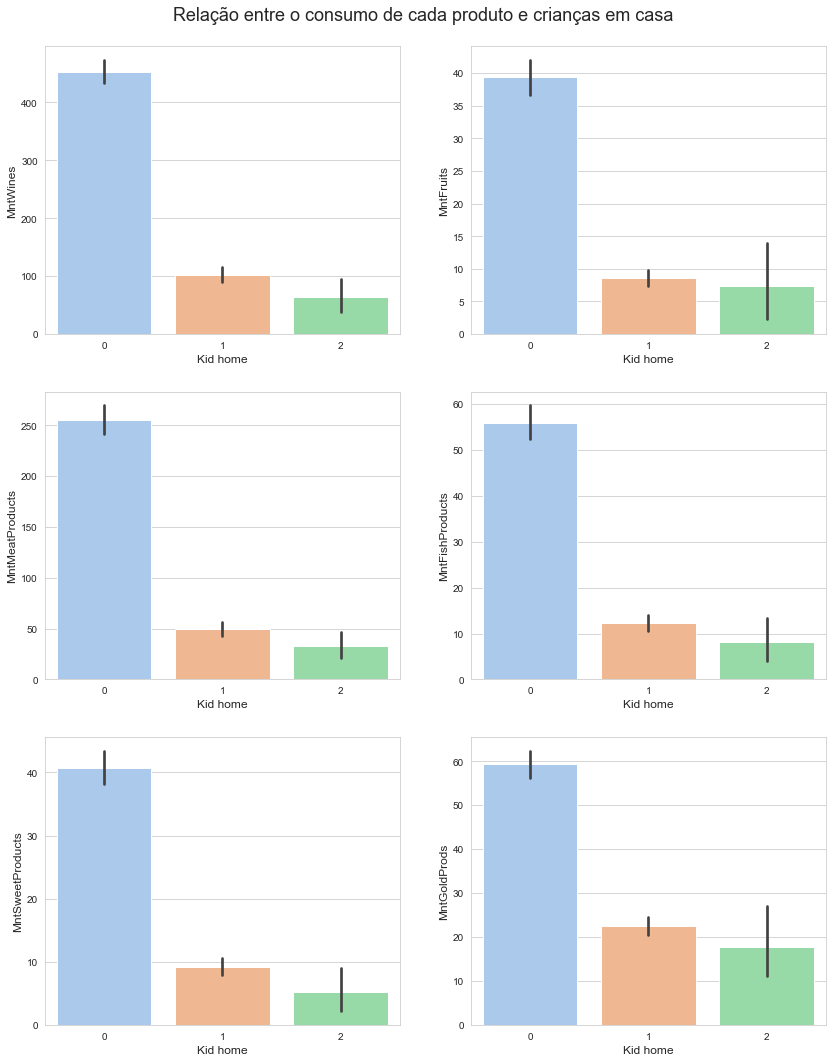

In [30]:
# Criando subplots para os 6 gráficos
fig, axs = plt.subplots(3, 2, figsize=(14,18))
fig.suptitle("Relação entre o consumo de cada produto e crianças em casa", fontsize=18, va= "baseline", y=0.9);

# Barplot para relacionar a o valor médio gasto pelos clientes, dividios em 0, 1 e 2 filhos, com cada produto
sns.barplot(ax=axs[0,0], x="Kidhome", y="MntWines", data=df, palette="pastel"); # MntWines
axs[0,0].set_xlabel('Kid home', fontsize = 12)
axs[0,0].set_ylabel('MntWines', fontsize = 12)

sns.barplot(ax=axs[0,1], x="Kidhome", y="MntFruits", data=df, palette="pastel"); # MntFruits
axs[0,1].set_xlabel('Kid home', fontsize = 12)
axs[0,1].set_ylabel('MntFruits', fontsize = 12)

sns.barplot(ax=axs[1,0], x="Kidhome", y="MntMeatProducts", data=df, palette="pastel"); # MntMeatProducts
axs[1,0].set_xlabel('Kid home', fontsize = 12)
axs[1,0].set_ylabel('MntMeatProducts', fontsize = 12)

sns.barplot(ax=axs[1,1], x="Kidhome", y="MntFishProducts", data=df, palette="pastel"); # MntFishProducts
axs[1,1].set_xlabel('Kid home', fontsize = 12)
axs[1,1].set_ylabel('MntFishProducts', fontsize = 12)

sns.barplot(ax=axs[2,0], x="Kidhome", y="MntSweetProducts", data=df, palette="pastel");# MntSweetProducts
axs[2,0].set_xlabel('Kid home', fontsize = 12)
axs[2,0].set_ylabel('MntSweetProducts', fontsize = 12)

sns.barplot(ax=axs[2,1], x="Kidhome", y="MntGoldProds", data=df, palette="pastel");# MntGoldProds
axs[2,1].set_xlabel('Kid home', fontsize = 12)
axs[2,1].set_ylabel('MntGoldProds', fontsize = 12);

In [31]:
# Comparando o número de clientes com 0, 1 e 2 filhos
df["Kidhome"].value_counts()

0    1170
1     816
2      43
Name: Kidhome, dtype: int64

In [32]:
# Criando um novo dataframe com todas as colunas de produtos e coluna Kidhome
df_kid = pd.concat([df.loc[:, "MntWines":"MntGoldProds"], df["Kidhome"]], axis=1)

# Groupby pelo número de filhos, e somando todos os valores de produtos
df_kid_group = df_kid.groupby(["Kidhome"])[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum().reset_index()
df_kid_group

,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,529438,46056,299103,65426,47669,69332
1,1,83915,7007,40189,10037,7448,18336
2,2,2767,319,1414,347,222,765


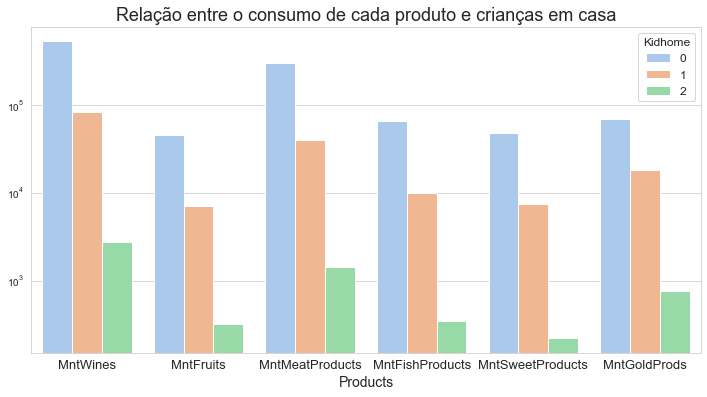

In [33]:
# Definindo tamanho do gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para representar a soma dos valores gastos dos clientes, divididos em número de filhos, com cada produto
tidy = df_kid_group.melt(id_vars='Kidhome').rename(columns=str.title)
sns.barplot(x='Variable', y='Value', hue='Kidhome', data=tidy, ax=ax1, palette="pastel", log=True)

# Configurando título e eixos
ax1.set_title("Relação entre o consumo de cada produto e crianças em casa", fontdict={'size':18})
ax1.set_xlabel('Products', fontsize = 14)
ax1.set_ylabel(None)
plt.xticks(fontsize=13)

# Configurando legenda
plt.legend(title="Kidhome", title_fontsize="large", fontsize='large');

### 3 - Qual a relação entre o consumo de cada produto e escolaridade?

In [34]:
# Criando um novo dataframe com todas as colunas de produtos e coluna Education
df_edu = pd.concat([df.loc[:, "MntWines":"MntGoldProds"], df["Education"]], axis=1)

# Groupby pela Education, e somando todos os valores de produtos
df_edu_group = df_edu.groupby(["Education"])[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum().reset_index()
df_edu_group

,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,2n Cycle,36939,5302,25669,8342,6333,8377
1,Basic,382,549,579,869,618,1115
2,Graduation,290892,31868,186056,44468,32463,51406
3,Master,111266,7369,54693,10825,7199,13489
4,PhD,176641,8294,73709,11306,8726,14046


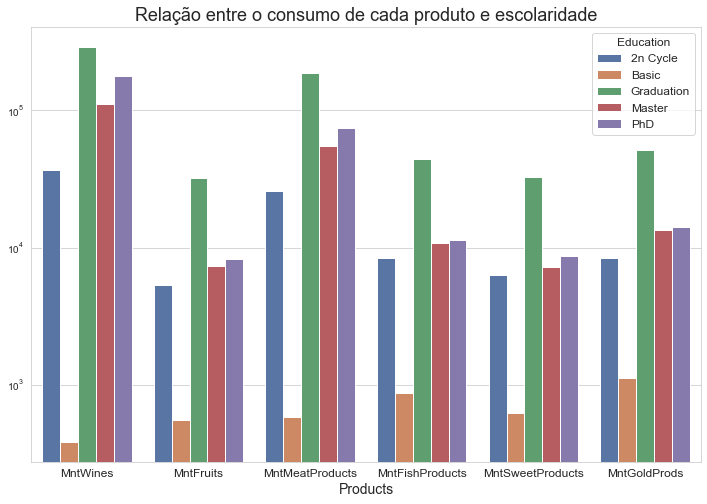

In [36]:
# Definindo tamanho do gráfico
fig, ax1 = plt.subplots(figsize=(12, 8))

# Gráfico de barras para representar a soma dos valores gastos dos clientes, divididos em escolaridade, com cada produto
tidy = df_edu_group.melt(id_vars='Education').rename(columns=str.title)
sns.barplot(x='Variable', y='Value', hue='Education', data=tidy, ax=ax1, palette="deep", log=True)

# Configurando título e eixos
ax1.set_title("Relação entre o consumo de cada produto e escolaridade", fontdict={'size':18})
ax1.set_xlabel('Products', fontsize = 14)
ax1.set_ylabel(None)
plt.xticks(fontsize=12)

# Configurando legenda
plt.legend(title="Education", title_fontsize="large", fontsize='large');

# Observações:
# O produto que clientes com ensino básico mais gastam é ouro e o que menos gastam é vinho

### 4 - Gasto total com cada produto

In [37]:
# Criando um novo dataframe com todos os produtos e somando o valor gasto em cada produto
df_produtos = pd.DataFrame(df.loc[:, "MntWines": "MntGoldProds"].sum(), columns=["Sum"]).reset_index()
df_produtos.rename({"index": "Product"}, axis=1, inplace=True) #renomeando as colunas
df_produtos

,Product,Sum
0,MntWines,616120
1,MntFruits,53382
2,MntMeatProducts,340706
3,MntFishProducts,75810
4,MntSweetProducts,55339
5,MntGoldProds,88433


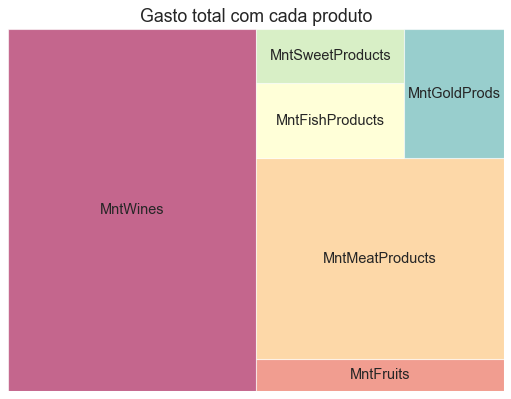

In [38]:
# Definindo tamanho do gráfico
plt.figure(figsize=(8,6), dpi= 80)

# Configurando cores do gráfico
colors = [plt.cm.Spectral(i/float(6)) for i in range(6)]

# Gráfico Treemap relacionando o valor total gasto com cada produto
squarify.plot(sizes=df_produtos["Sum"], label=df_produtos["Product"].values.tolist(), color=colors, alpha=.6, text_kwargs={'fontsize':13})

# Configurando título e eixos:
plt.title("Gasto total com cada produto", fontdict={'size':16})
plt.xticks(fontsize=20)
plt.axis("off"); # Não mostrar eixos

### 5 - Relação entre aceitação nas campanhas publicitárias e escolaridade dos clientes

In [39]:
# Criando um novo dataframe com pivot_table, agrupados pela escolaridade, e somando os clientes que aceitaram cada campanha publicitária
table1 = pd.pivot_table(df, 
                       index='Education', 
                       values=["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], 
                       aggfunc=np.sum).reset_index()
table1

,Education,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,2n Cycle,11,2,14,10,9,21
1,Basic,0,0,5,0,0,2
2,Graduation,76,14,72,76,75,138
3,Master,18,2,22,28,26,51
4,PhD,28,8,34,41,35,89


In [40]:
# Criando dataframe para contar quantos clientes temos em cada faixa de escolaridade
df1 = pd.DataFrame(df["Education"].value_counts()).reset_index()
df1.rename({"index": "Education", "Education": "EducationCount"}, axis=1, inplace=True) # Renomeando colunas
df1

,Education,EducationCount
0,Graduation,1022
1,PhD,439
2,Master,335
3,2n Cycle,184
4,Basic,49


In [41]:
table1 = table1.merge(df1, how='inner') # merge entre os dois df's criados acima

# transformando os dados para porcentagem
table1 = (table1[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]].div(table1["EducationCount"], axis=0)*100).style.format('{0:,.2f}%').data
table1

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,5.978261,1.086957,7.608696,5.434783,4.891304,11.413043
1,0.000000,0.000000,10.204082,0.000000,0.000000,4.081633
2,7.436399,1.369863,7.045010,7.436399,7.338552,13.502935
3,5.373134,0.597015,6.567164,8.358209,7.761194,15.223881
4,6.378132,1.822323,7.744875,9.339408,7.972665,20.273349


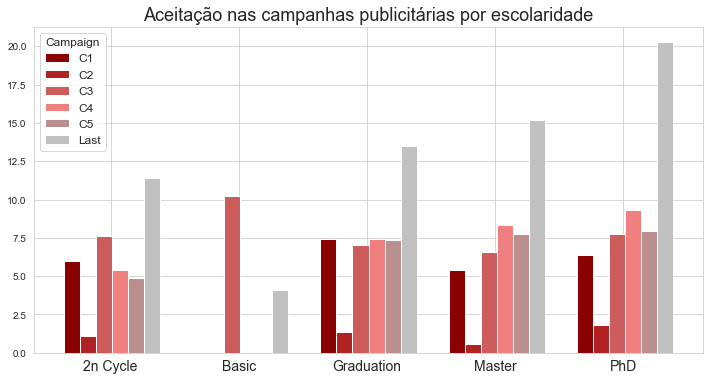

In [42]:
plt.figure(figsize=(12,6)) # Definindo tamanho do gráfico

x1 =  np.arange(1, 10, 2) # Configurando o espaçamento entre os valores no eixo x, para as barras ficarem lado a lado 
x2 = [x + 0.25 for x in x1]
x3 = [x + 0.25 for x in x2]
x4 = [x + 0.25 for x in x3]
x5 = [x + 0.25 for x in x4]
x6 = [x + 0.25 for x in x5]

y1 = table1.AcceptedCmp1.tolist()
plt.bar(x1, y1, width=0.25, label="C1", color="darkred")

y2 = table1.AcceptedCmp2.tolist()
plt.bar(x2, y2, width=0.25, label="C2", color="firebrick")

y3 = table1.AcceptedCmp3.tolist()
plt.bar(x3, y3, width=0.25, label="C3", color="indianred") #

y4 = table1.AcceptedCmp4.tolist()
plt.bar(x4, y4, width=0.25, label="C4", color="lightcoral")

y5 = table1.AcceptedCmp5.tolist()
plt.bar(x5, y5, width=0.25, label="C5", color="rosybrown")

y6 = table1.Response.tolist()
plt.bar(x6, y6, width=0.25, label="Last", color="silver")

# Configurando eixo x
education = ['2n Cycle','Basic','Graduation','Master','PhD']
plt.xticks([x + 0.6 for x in range(1, 10, 2)], education, fontsize=14)

# Configurando legenda e título
plt.legend(title="Campaign", title_fontsize="large", fontsize='large')
plt.title("Aceitação nas campanhas publicitárias por escolaridade", fontdict={'size':18});

### 6 - Relação entre aceitação nas campanhas publicitárias e renda dos clientes

In [43]:
# Criando um novo dataframe com pivot_table, agrupados pela faixa de renda, e somando os clientes que aceitaram cada campanha publicitária
table2 = pd.pivot_table(df, 
                       index='cut_income', 
                       values=["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], 
                       aggfunc=np.sum).reset_index()
table2

,cut_income,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,"(1500, 20000]",0,0,11,0,0,12
1,"(20000, 50000]",3,3,67,18,0,97
2,"(50000, 80000]",65,12,47,98,52,116
3,"(80000, 165000]",65,11,22,39,93,76


In [44]:
# Criando dataframe para contar quantos clientes temos em cada faixa de renda
df2 = pd.DataFrame(df["cut_income"].value_counts()).reset_index()
df2.rename({"index": "cut_income", "cut_income": "IncomeCount"}, axis=1, inplace=True) #renomeando as colunas
df2

,cut_income,IncomeCount
0,"(50000, 80000]",878
1,"(20000, 50000]",841
2,"(80000, 165000]",194
3,"(1500, 20000]",116


In [45]:
table2 = table2.merge(df2, how='inner') # merge entre os dois df's criados acima

# transformando os dados para porcentagem
table2 = (table2[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]].div(table2["IncomeCount"], axis=0)*100).style.format('{0:,.2f}%').data
table2

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0.000000,0.000000,9.482759,0.000000,0.000000,10.344828
1,0.356718,0.356718,7.966706,2.140309,0.000000,11.533888
2,7.403189,1.366743,5.353075,11.161731,5.922551,13.211845
3,33.505155,5.670103,11.340206,20.103093,47.938144,39.175258


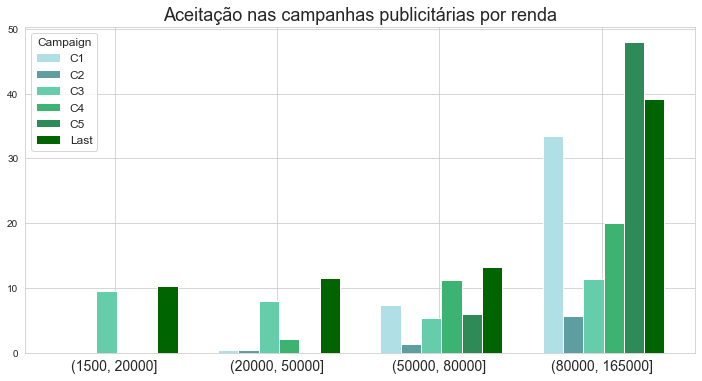

In [46]:
plt.figure(figsize=(12,6)) # Definindo tamanho do gráfico

x1 =  np.arange(1, 8, 2) # Configurando o espaçamento entre os valores no eixo x, para as barras ficarem lado a lado 
x2 = [x + 0.25 for x in x1]
x3 = [x + 0.25 for x in x2]
x4 = [x + 0.25 for x in x3]
x5 = [x + 0.25 for x in x4]
x6 = [x + 0.25 for x in x5]

y1 = table2.AcceptedCmp1.tolist()
plt.bar(x1, y1, width=0.25, label="C1", color="powderblue")

y2 = table2.AcceptedCmp2.tolist()
plt.bar(x2, y2, width=0.25, label="C2", color="cadetblue")

y3 = table2.AcceptedCmp3.tolist()
plt.bar(x3, y3, width=0.25, label="C3", color="mediumaquamarine")

y4 = table2.AcceptedCmp4.tolist()
plt.bar(x4, y4, width=0.25, label="C4", color="mediumseagreen")

y5 = table2.AcceptedCmp5.tolist()
plt.bar(x5, y5, width=0.25, label="C5", color="seagreen")

y6 = table2.Response.tolist()
plt.bar(x6, y6, width=0.25, label="Last", color="darkgreen")

# Configurando eixo x
income = ['(1500, 20000]','(20000, 50000]','(50000, 80000]','(80000, 165000]']
plt.xticks([x + 0.6 for x in range(1, 8, 2)], income, fontsize=14)

# Configurando legenda e título
plt.legend(title="Campaign", title_fontsize="large", fontsize='large')
plt.title("Aceitação nas campanhas publicitárias por renda", fontdict={'size':18});

### 7 - Relação entre NumWebVisitMonth e Income

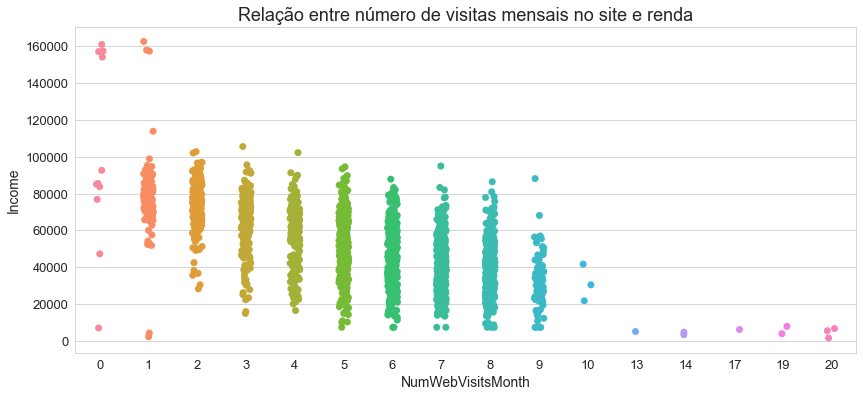

In [47]:
# Definindo tamanho do gráfico
plt.figure(figsize=(14,6))

# Gráfico Stripplot, entre o número de visitas mensais do cliente no site e a renda, pois essas variáveis tem uma
# correlação negativa alta
sns.stripplot(x="NumWebVisitsMonth",y="Income",data=df, size=7);

# Configurando título e eixos
plt.title("Relação entre número de visitas mensais no site e renda", fontdict={'size':18})
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);
plt.xlabel("NumWebVisitsMonth", fontdict={'size':14});
plt.ylabel("Income", fontdict={'size':14});

### 8 - Relação entre o total gasto e o local em que o cliente efetuou a compra

In [48]:
# Criando um novo dataframe com as somas das colunas NumWebPurchases, NumCatalogPurchases, NumStorePurchases
df4 = pd.DataFrame(df.loc[:,"NumWebPurchases":"NumStorePurchases"].sum()).reset_index().rename({"index": "SalesChannels", 0: "Counts"}, axis=1)
df4

,SalesChannels,Counts
0,NumWebPurchases,8318
1,NumCatalogPurchases,5395
2,NumStorePurchases,11728


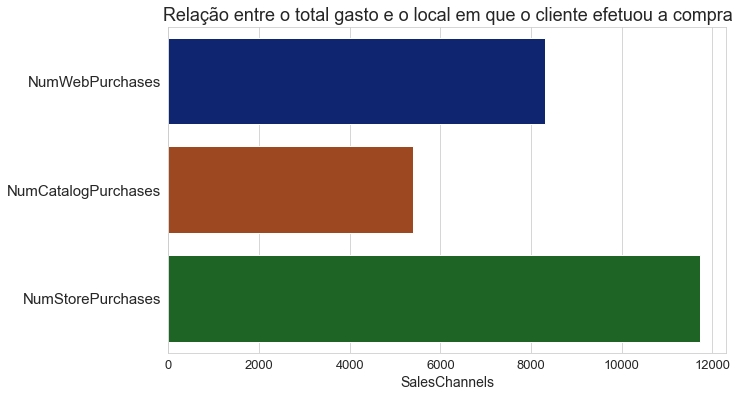

In [49]:
# Definindo tamanho do gráfico
plt.figure(figsize=(10,6))

# Gráfico que relaciona a quantidade de vendas em cada canal de venda da loja
sns.barplot(x="Counts",y="SalesChannels",data=df4, palette="dark");

# Configurando título e eixos
plt.title("Relação entre o total gasto e o local em que o cliente efetuou a compra", fontdict={'size':18})
plt.xticks(fontsize=13);
plt.yticks(fontsize=15);
plt.xlabel("SalesChannels", fontdict={'size':14});
plt.ylabel(None);

## Conclusões

Nossa análise foi baseada na venda, em dois anos, de vinho, carne, peixe, doces, frutas e ouro em relação a 
diferentes características dos clientes.


1) Os produtos não são atrativos para casais com crianças.

2) Em relação a quantidade de produtos vendidos, a loja é o meio em que são realizadas mais vendas. Entretanto, quando
analisamos o faturamento dos três canais de venda (site, loja e catálogo) eles são praticamente iguais.

3) Os produtos com que os clientes gastam mais dinheiro são são vinho e carne.

4) Pessoas com maior renda fazem menos visitas ao site por mês (correlação negativa).

5) O estado civil e a idade não influenciam no total de gastos.

6) Exceto para a educação básica a maioria das pessoas aceita na última campanha publicitária.